## **Decision Trees**
### We will first install 2 libraries - pickle 5 and imbalanced-learn

In [ ]:
!pip3 install pickle5
!pip3 install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 256 kB 13.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pickle5 as pickle
from imblearn.over_sampling import SMOTE


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# df = pd.read_pickle("drive/MyDrive/categorical_features_data_flightdelay.pkl")
#Import the library
import pickle5 as pickle

path = 'drive/MyDrive/Train_Test_Data_Airport_Flight_Delays.pkl'

with open(path, "rb") as dt:
  df = pickle.load(dt)
# print(df)
# df['DEP_DEL15'] = df['DEP_DEL15'].astype(str)
# df.loc[df['DEP_DEL15']=='0'] = 'Not Delayed'
# df.loc[df['DEP_DEL15']=='1'] = 'Delayed'
df.drop('index',axis=1,inplace=True)

### Creating train and test splits

In [ ]:
 
y = df['DEP_DEL15']
X = df.drop('DEP_DEL15',axis = 1)

In [ ]:
y.value_counts()

0    41398
1    14954
Name: DEP_DEL15, dtype: int64

In [ ]:
X

,MONTH,DAY_OF_WEEK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,CARRIER_NAME_INT,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,LATITUDE,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND
0,2,7,2,4,15,14,4769,819756,13382999,0.000062,0.000099,15,41.785,-87.752,0.02,0.0,0.0,50.0,24.38
1,10,6,4,2,8,14,6890,819756,13382999,0.000062,0.000099,19,41.785,-87.752,2.18,0.0,0.0,48.0,12.53
2,9,3,4,1,13,14,6386,819756,13382999,0.000062,0.000099,4,41.785,-87.752,0.00,0.0,0.0,69.0,8.95
3,4,6,7,2,16,14,6362,819756,13382999,0.000062,0.000099,2,41.785,-87.752,0.00,0.0,0.0,66.0,4.92
4,2,7,3,3,12,14,4769,819756,13382999,0.000062,0.000099,12,41.785,-87.752,0.20,3.1,0.0,27.0,11.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56347,4,6,3,4,14,14,6362,819756,13382999,0.000062,0.000099,15,41.785,-87.752,0.00,0.0,0.0,66.0,4.92
56348,9,4,2,1,16,14,6386,819756,13382999,0.000062,0.000099,5,41.785,-87.752,0.00,0.0,0.0,74.0,4.92
56349,2,2,2,2,18,14,4769,819756,13382999,0.000062,0.000099,9,41.785,-87.752,0.00,0.0,3.1,35.0,4.70
56350,9,7,3,2,11,14,6386,819756,13382999,0.000062,0.000099,15,41.785,-87.752,0.34,0.0,0.0,73.0,4.47


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import numpy as np
X.drop(['LATITUDE','LONGITUDE'],axis=1,inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2022, stratify = y)

### Doing SMOTE over-sampling to account for imbalance in the data

In [ ]:

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [ ]:
y_train.value_counts()

1    28978
0    28978
Name: DEP_DEL15, dtype: int64

In [ ]:
y_test.value_counts()

0    12420
1     4486
Name: DEP_DEL15, dtype: int64

### Running Grid Search CV with 5-fold cross validation for hyperparameter tuning

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_validate

cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 22)


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

In [ ]:
max_depth = range(2,50)
criterion = ['entropy','gini','log_loss']
splitter = ['best','random']
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 22)
params = {'criterion':criterion,'splitter':splitter,'max_depth':max_depth}
tree = DecisionTreeClassifier()
gSMO
grid_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
480 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=22, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini', 'log_loss'],
                         'max_depth': range(2, 50),
                         'splitter': ['best', 'random']},
             verbose=1)

DecisionTreeClassifier(criterion='entropy', max_depth=49)
[0.03013047 0.0401497  0.1312439  0.1009693  0.17326635 0.00344664
 0.0244923  0.         0.00108592 0.00124647 0.00968604 0.22694549
 0.06819062 0.01117925 0.00790042 0.07979346 0.09027367]


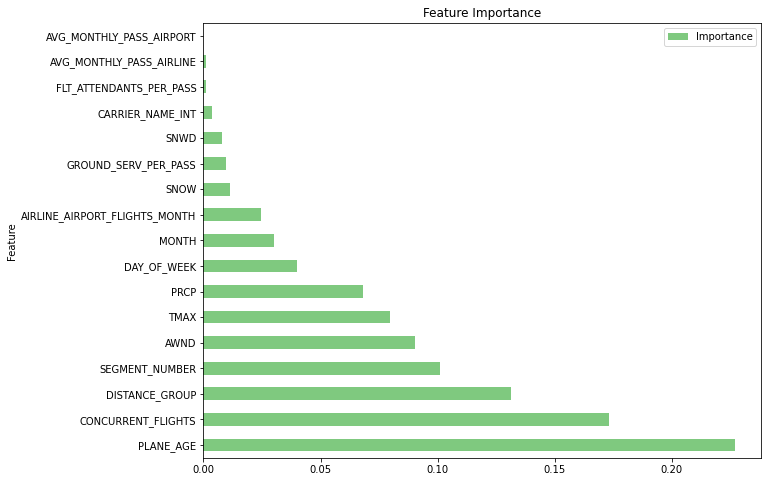

In [ ]:
print(grid_search_cv.best_estimator_)
grid_search_cv.feature_names_in_
print(grid_search_cv.best_estimator_.feature_importances_)
features = pd.DataFrame({'Feature':grid_search_cv.feature_names_in_,'Importance':grid_search_cv.best_estimator_.feature_importances_})
features.set_index('Feature',inplace=True)
features.sort_values(by='Importance',ascending=False).plot.barh(figsize=(10,8),colormap='Accent',title='Feature Importance')


# **We find the best estimator with depth**
### In our case the best max depth is 49 while the impurity criteria should be entropy

In [ ]:
y_pred = grid_search_cv.predict(X_test)

In [ ]:

print(precision_score(y_test, y_pred, pos_label = 1))
print(recall_score(y_test, y_pred, pos_label = 1))
print(f1_score(y_test, y_pred, pos_label = 1))
print(classification_report(y_test,y_pred,labels = [True, False]))
print(confusion_matrix(y_test,y_pred, labels = [0, 1]))
print(accuracy_score(y_test, y_pred))

0.3574842286369719
0.4168524297815426
0.3848924565195018
              precision    recall  f1-score   support

        True       0.36      0.42      0.38      4486
       False       0.78      0.73      0.75     12420

    accuracy                           0.65     16906
   macro avg       0.57      0.57      0.57     16906
weighted avg       0.66      0.65      0.65     16906

[[9059 3361]
 [2616 1870]]
0.64645687921448


In [ ]:
from sklearn.metrics import PrecisionRecallDisplay,roc_curve, roc_auc_score,auc


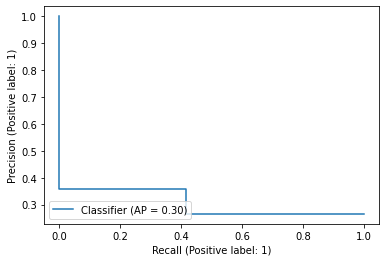

In [ ]:
PrecisionRecallDisplay.from_predictions(y_test, y_pred)

In [ ]:
predictions = grid_search_cv.predict_proba(X_test)
print(predictions)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


0.5740442173647411


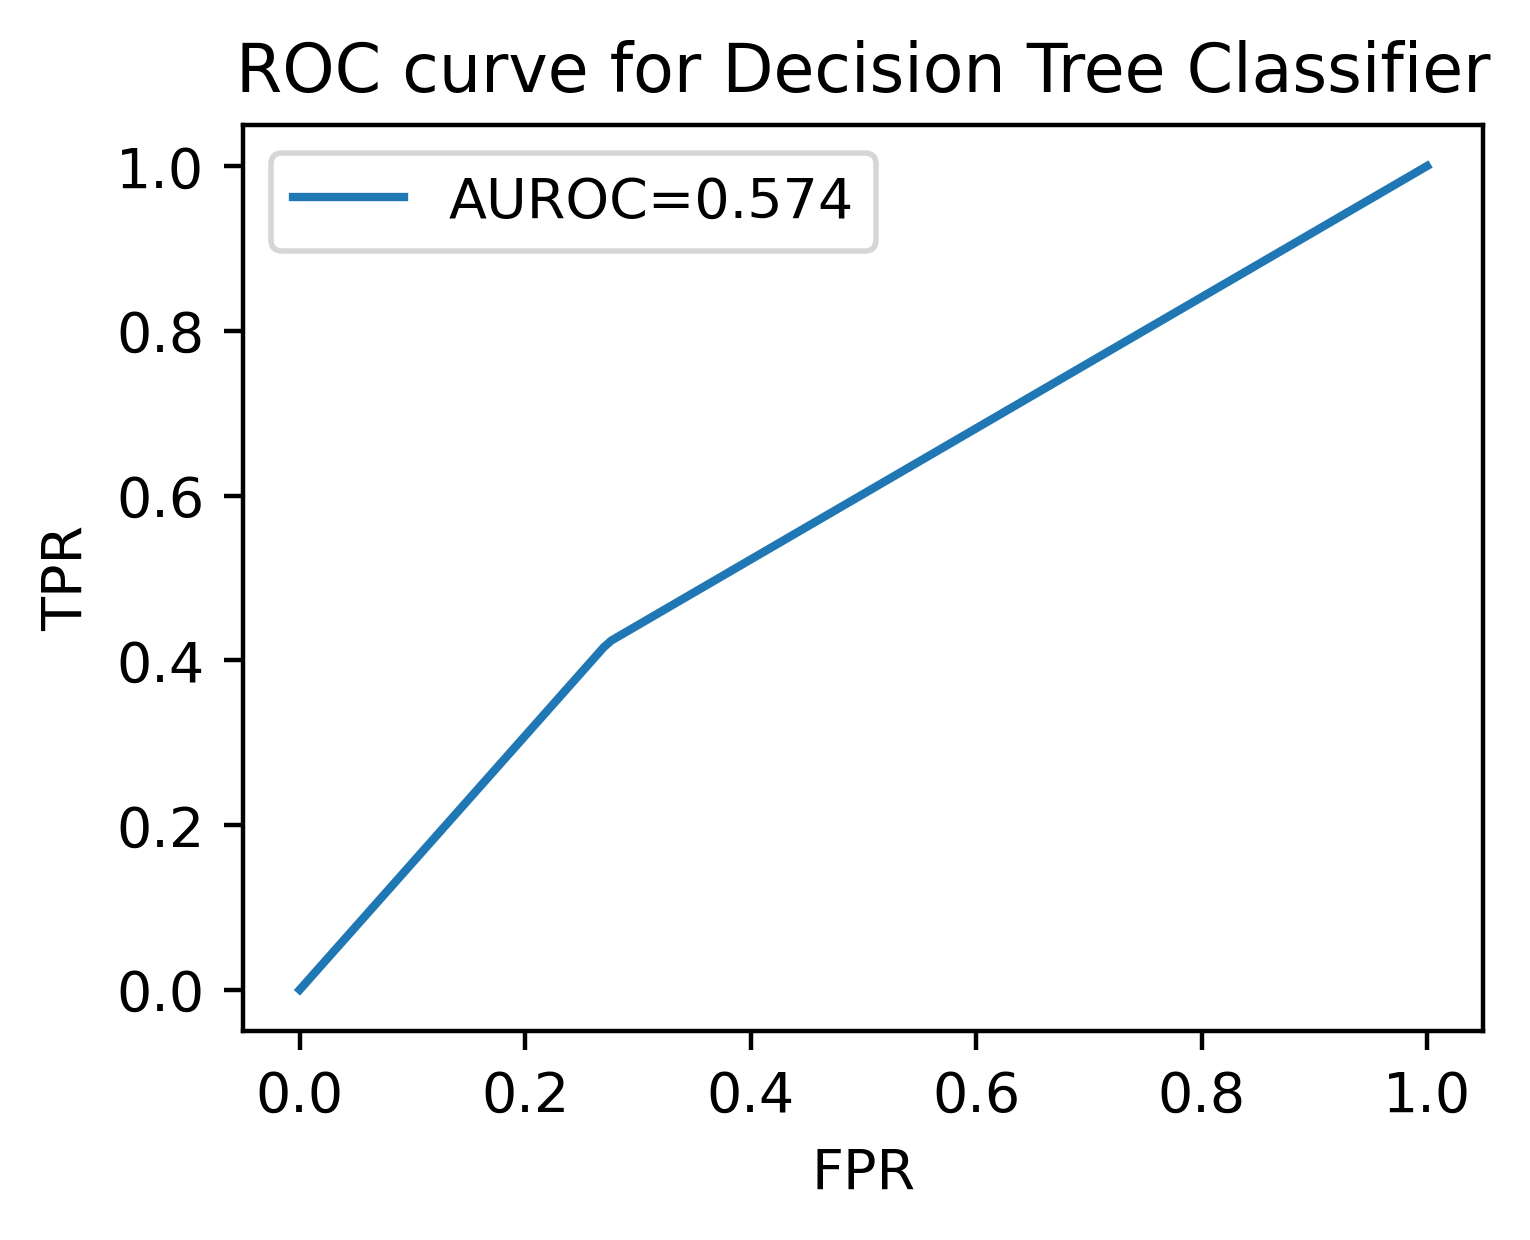

In [ ]:
print(roc_auc_score(y_test, predictions[:,1]))

fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
roc_auc = auc(fpr,tpr)

plt.figure(figsize=(4,3),dpi=400)
plt.clf()
plt.plot(fpr, tpr,label=f'AUROC={roc_auc:.3f}')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.title('ROC curve for Decision Tree Classifier')
plt.legend()

plt.show()

[[0.11061162 0.15473796]
 [0.19880516 0.53584526]]


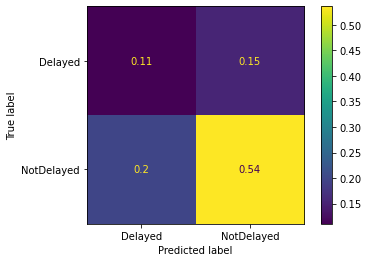

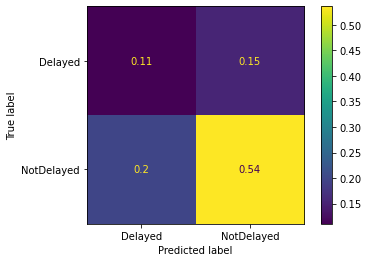

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
labels = ['Delayed', 'NotDelayed']
cm = confusion_matrix(y_test,y_pred ,labels=[1,0],normalize='all')
print(cm)
cmd = ConfusionMatrixDisplay.from_predictions(y_test,y_pred,labels=[1,0],display_labels=['Delayed','NotDelayed'],normalize='all')
cmd.plot()

In [ ]:
cost_benefit_matrix = np.array([[-50, -500], [-100, 100]])

In [ ]:

cm = confusion_matrix(y_test,y_pred ,labels=[1,0],normalize='all')

In [ ]:
import numpy as np

In [ ]:
np.multiply(cm,cost_benefit_matrix).sum()

-48.28463267479002